# Predicting price of house in Nepal

In this notebook, we're trying to predict housing price in Nepal

## 1. Problem Defination

> How can we predict the price of house in Nepal given the characteristic of the house and prices of them?

## 2. Data

The data is downloaded from Kaggle: https://www.kaggle.com/sagyamthapa/nepali-housing-price-dataset


## 3. Evaluation

Since this is a Regression problem, R^2, Mean Absolute value and Root Mean Squared value is taken for evaluation

## 4. Features

This dataset includes following columns

Title ------------------------------------->Tile of post

Address ---------------------------------->Address of property

City--------------------------------------->Last word in address (usually the district)

Price-------------------------------------->Price in NRs.

Bedroom --------------------------------->No of bedrooms (0/ NA for land)

Bathroom--------------------------------->No of bathrooms (0/ NA for land)

Floors------------------------------------->No of floors (0/ NA for land)

Parking----------------------------------->No of parking space

Face-------------------------------------->Direction property is facing

Year-------------------------------------->Year of construction (Not available for some houses)

Views-------------------------------------->No of views (Determines how visually attractive the house is)

Area-------------------------------------->Area occupied by property (Anna,ropani,kattha,sq feet)

Road-------------------------------------->Road size and width as give by seller

Road Width-------------------------------->Road width extracted from given string

Road Type--------------------------------->Road type extracted from given string (Graveled,Blacktop etc)

Build Area--------------------------------->Area occupied by house ((Anna,ropani,kattha,sq feet)

Posted ----------------------------------->Date property was posted relative to scraping date

(views/posted ratio may be a good indicator for how visually appealing the
house is)

Amenities ------------------------------->Amenities(Garden,Security etc). House with more amenities are typically
premium ones


To further understand the nature of this data visit basobaas.com. Note that converting area to a standard unit is the most challenging part as there are variety of units (anna,ropani,kattha etc) used.Also absence of floors means the property is a land.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/2020-4-27.csv")
df.head()

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
0,Flat System House On Sale At Budhanikantha : H...,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,West,2073.0,17,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,18-0-0-0 Aana,11 hours ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,21 Aana Beautiful House : House For Sale In Bu...,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,East,2073.0,26,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-0-0 Aana,12 hours ago,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Beautiful To Floor House : House For Sale In D...,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000,5,3,2.0,12,East,2071.0,154,1-1-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,10-1-0-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Modern Architecture Bungalow House : House For...,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000,6,4,3.0,9,West,2017.0,17,0-10-1-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-7-1-0 Aana,1 day ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Modern Bungalow House : House For Sale In Golf...,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000,6,3,2.0,10,East,2070.0,59,0-19-2-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-2-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."


In [3]:
len(df)

2211

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2211 non-null   object 
 1   Address     2211 non-null   object 
 2   City        2211 non-null   object 
 3   Price       2211 non-null   int64  
 4   Bedroom     2211 non-null   int64  
 5   Bathroom    2211 non-null   int64  
 6   Floors      1039 non-null   float64
 7   Parking     2211 non-null   int64  
 8   Face        2211 non-null   object 
 9   Year        582 non-null    float64
 10  Views       2211 non-null   object 
 11  Area        2211 non-null   object 
 12  Road        2211 non-null   object 
 13  Road Width  2211 non-null   object 
 14  Road Type   1426 non-null   object 
 15  Build Area  2211 non-null   object 
 16  Posted      2211 non-null   object 
 17  Amenities   2211 non-null   object 
dtypes: float64(2), int64(4), object(12)
memory usage: 311.0+ KB


In [5]:
df.isna().sum()

Title            0
Address          0
City             0
Price            0
Bedroom          0
Bathroom         0
Floors        1172
Parking          0
Face             0
Year          1629
Views            0
Area             0
Road             0
Road Width       0
Road Type      785
Build Area       0
Posted           0
Amenities        0
dtype: int64

In [6]:
df_tmp = df.copy()

In [7]:
df_tmp.head().T

,0,1,2,3,4
Title,Flat System House On Sale At Budhanikantha : H...,21 Aana Beautiful House : House For Sale In Bu...,Beautiful To Floor House : House For Sale In D...,Modern Architecture Bungalow House : House For...,Modern Bungalow House : House For Sale In Golf...
Address,"Budhanikantha, Budhanilkantha, Kathmandu","Pasikot, Budhanilkantha, Kathmandu","Dhapasi, Dhapasi, Kathmandu","baluwatar, Baluwatar, Kathmandu","Golfutar, Golfutar, Kathmandu"
City,Kathmandu,Kathmandu,Kathmandu,Kathmandu,Kathmandu
Price,90000000,80000000,70000000,130000000,100000000
Bedroom,6,5,5,6,6
Bathroom,3,3,3,4,3
Floors,2,2,2,3,2
Parking,10,9,12,9,10
Face,West,East,East,West,East
Year,2073,2073,2071,2017,2070


In [8]:
df_tmp.head().T

,0,1,2,3,4
Title,Flat System House On Sale At Budhanikantha : H...,21 Aana Beautiful House : House For Sale In Bu...,Beautiful To Floor House : House For Sale In D...,Modern Architecture Bungalow House : House For...,Modern Bungalow House : House For Sale In Golf...
Address,"Budhanikantha, Budhanilkantha, Kathmandu","Pasikot, Budhanilkantha, Kathmandu","Dhapasi, Dhapasi, Kathmandu","baluwatar, Baluwatar, Kathmandu","Golfutar, Golfutar, Kathmandu"
City,Kathmandu,Kathmandu,Kathmandu,Kathmandu,Kathmandu
Price,90000000,80000000,70000000,130000000,100000000
Bedroom,6,5,5,6,6
Bathroom,3,3,3,4,3
Floors,2,2,2,3,2
Parking,10,9,12,9,10
Face,West,East,East,West,East
Year,2073,2073,2071,2017,2070


In [9]:
df_tmp["Road Type"].value_counts()

 Blacktopped        749
 Gravelled          404
 Soil Stabilized    167
 Paved               77
 Concrete            25
 Alley                4
Name: Road Type, dtype: int64

In [10]:
df_tmp["Area"].value_counts()

4 Aana              163
3 Aana               86
5 Aana               71
0-4-0-0 Aana         66
8 Aana               57
                   ... 
15-10-0-0 Ropani      1
3.1.0 Aana            1
0-5-0 Aana            1
320 Sq. Feet          1
4 Kattha              1
Name: Area, Length: 604, dtype: int64

Getting units for conversion

In [11]:
df_tmp.iloc[88]

Title         House Sale In Thulo Bharyang : House For Sale ...
Address               Thulo bharyang, Thulo Bharyang, Kathmandu
City                                                  Kathmandu
Price                                                  25000000
Bedroom                                                       8
Bathroom                                                      4
Floors                                                        5
Parking                                                       0
Face                                                      North
Year                                                        NaN
Views                                                       325
Area                                         dont know Sq. Feet
Road                                         13 Feet / Concrete
Road Width                                             13 Feet 
Road Type                                              Concrete
Build Area                              

In [12]:
a = 0
for i in list(df_tmp["Area"]):
    if "," in i:
        print(a)
        print(i)
    a += 1

605
4,5,6,7,8 aana Aana
629
0-8,9,10-0-0 Aana
1033
4,5,6,7,8 aana Aana


In [13]:
def hasNumbers(inputString):
    """
    Checks if a string has a number or not
    """
    return any(char.isdigit() for char in inputString)

In [14]:
def Conversion(element, t, position=0):
    """
    Converts value into Sq. Meter
    """
    if t == 1:
        if position == 0:
            return element * 31.796057853224
        if position == 1:
            return element * 508.73692565158
        if position == 2:
            return element * 7.9490144633059
        if position >= 3:
            return element * 1.99
    if t == 2:
        if position == 0:
            return element * 6772.41
        if position == 1:
            return element * 338.62
        if position >= 2:
            return element * 16.93
    if t == 3:
        return element * 0.092903017832647
    if t == 4:
        return element * 0.20903184

In [15]:
def hasDash(element, unit):
    """
    Seperates elements which has dash then converts it all to Sq. Meter according ko the necessary conversion units
    Note: Here we've taken element which has "-" and unit of "Sq. Feet" as Mountain unit
    """
    all_unit = {1: {"Aana": 0, "Ropani": 1, "Paisa": 2, "Dam": 3}, 2: {"Bigha": 0, "Kattha": 1, "Dhur": 2},3: "Sq. Feet", 4 :"Haat"}
    first_common = ["Aana", "Ropani", "Paisa", "Dam", "Sq. Feet"]     # Mountain Conversion units
    second_common = ["Bigha", "Kattha", "Dhur"]          # Terai Conversion units    
    seperated_value = element.split("-")
    sum = 0.0
    f = 0
    for ele in element:
        if "*" in ele or "x" in ele or "/" in ele:
            numbers = hasMult(seperated_value[f], unit, all_unit)
            temp = 1
            for i in numbers:
                temp = temp * float(i)
#             print(temp)
            seperated_value[f] = str(temp)
        if ele == "-":
            f += 1
    if unit in first_common:
        for index, value in enumerate(seperated_value):
            if value == "":
                continue
            value = value.replace("+",".")
            value = value.replace(":", ".")
            check = value.split(".") # Check if number has more than one decimal points if yes then ignoring 2nd one
            if len(check) > 2:
                temp = []
                for i in range(0,2):
                    temp.append(check[i])
                value = ".".join(temp)
            sum = sum + Conversion(float(value), 1, index)
        return sum
    if unit in second_common:
        for index, value in enumerate(seperated_value):
            if value == "":
                continue
            sum = sum + Conversion(float(value), 2, index)
        return sum

In [16]:
def hasMult(element, unit, all_unit):
    """
    if the value is "*", "x" or "/" sign it takes that as a multiplication sign and seperated multiplicand
    """
    element = element.replace("x", "*")
    element = element.replace("/", "*")
    seperate = element.split("*")
    numbers = []
    for i in seperate:
        numbers.append(i)
    return numbers

In [17]:
# Checking Units
def checkUnits(element, all_unit, unit):
    """
    Checks unit for a single element and returns converted value into Sq. Meter as string.
    """ 
    if unit == "Sq. Meter":
        return element
    if unit in list(all_unit[1].keys()):
        temp = Conversion(float(element), 1, all_unit[1][unit])
        print(f"Converted: {element} {unit} To: {temp}")
        return str(temp)
    if unit in list(all_unit[2]):
        temp = Conversion(float(element), 2, all_unit[2][unit])
        print(f"Converted: {element} {unit} To: {temp}")
        return str(temp)
    if unit in all_unit[3]:
        temp = Conversion(float(element), 3)
        print(f"Converted: {element} {unit} To: {temp}")
        return str(temp)
    if unit in all_unit[4]:
        temp = Conversion(float(element), 4)
        print(f"Converted: {element} hahaha {unit} To: {temp}")
        return str(temp)

In [18]:
# Converting everything area unit into Sq. Meter
def convertAllToMS(value, unit):
    """
    Coverts Aana, Sq. Feet, Ropani, Dhur, Khattha, Haat, Bigha, Paisa into Sq. Meter
    """
    all_unit = {1: {"Aana": 0, "Ropani": 1, "Paisa": 2, "Dam": 3}, 2: {"Bigha": 0, "Kattha": 1, "Dhur": 2},3: "Sq. Feet", 4 :"Haat"}
    actual_value = []
    for index, element in enumerate(value):
        if element == "":
            actual_value.append(None)
            print(f"Converted: {element} {unit[index]} To: NaN")
            continue
        if "-" in element:
            result = hasDash(element, unit[index])
            actual_value.append(result)
            print(f"Converted: {element} {unit[index]} To: {result}")
            continue
        elif "*" in element or "x" in element or "/" in element:
            numbers = hasMult(element, unit, all_unit)
            product = 1
            for ele in numbers:
                product = product * float(ele)
            temp = str(product)
            result = checkUnits(temp, all_unit, unit[index])
            actual_value.append(result)
            print(f"Converted: {element} {unit[index]} To: {result}")
            continue
        else:
            element = element.replace("+",".")
            element = element.replace(":", ".")
            check = element.split(".") # Check if number has more than one decimal points if yes then ignoring 2nd one
            if len(check) > 2:
                temp = []
                for i in range(0,2):
                    temp.append(check[i])
                element = ".".join(temp)
            result = checkUnits(element, all_unit, unit[index])
            actual_value.append(result)
            print(f"Converted: {element} {unit[index]} To: {result}")
            continue
    return actual_value

In [19]:
def get_unit_value(df, place):
    """
    Get's the unit and of area of land
    """
    if place == "Area":
        area_check = df["Area"].str.split(pat="-")
        value_check = df["Area"].str.split(pat=" ")
    else:
        area_check = df["Build Area"].str.split(pat="-")
        value_check = df["Build Area"].str.split(pat=" ")
    area_unit = []
    
    for index, lists in area_check.items():
        area_unit.append(lists[-1].split(" ", 1)[1:][0])
        
    for index, unit in enumerate(area_unit):
        while hasNumbers(area_unit[index]):
            area_unit[index] = area_unit[index].split(" ", 1)[-1]
        if not (area_unit[index] == "Sq. Feet" or area_unit[index] == "Sq. Meter"):
            area_unit[index] = area_unit[index].split(" ", 1)[-1]
    value = []
    for index, lists in value_check.items():
        numbers = ""
        for value_index, values in enumerate(lists):
            if(hasNumbers(values)):
                numbers = numbers + values
        value.append(numbers)
    for index, element in enumerate(value):
        if "," in element:
            value[index] = element.split(",")[-1]
        if "x" in element:
            continue
        if element.isupper() or element.islower():
            for i, s in enumerate(element):
                if i == 0:
                    continue
                try:
                    temp = str(float(element[:i]))
                except ValueError:
                    pass
            value[index] = temp
    """
    for checking purpose only
    """
#     print(f"{value[938]} {area_unit[938]}")
#     for index, area in enumerate(area_unit):
#         if value[index] == "":
#             print(f"{index}: {area_unit[index]}")
    final_value = convertAllToMS(value, area_unit)
    print(f"Initail Length: {len(value)} Final Length: {len(final_value)}")
    return final_value

Since in few values of Area and Build Area, Build Area is greater which is not actually possible the values are swapped for the data to be actually feasible

In [20]:
area = get_unit_value(df_tmp, "Area")
build_area = get_unit_value(df_tmp, "Build Area")
for index, values in enumerate(area):
    if build_area[index] == None or values == None:
        continue
    if float(build_area[index]) > float(area[index]):
        build_area[index], area[index] = area[index], build_area[index]

Converted: 1-0-0-0 Aana To: 31.796057853224
Converted: 0-21-0-0 Aana To: 10683.475438683181
Converted: 1-1-0-0 Aana To: 540.532983504804
Converted: 0-10-1-0 Aana To: 5095.318270979105
Converted: 0-19-2-0 Aana To: 9681.899616306631
Converted: 0-12-3-1 Aana To: 6130.680151208878
Converted: 3-1-1 Aana To: 612.074113674558
Converted: 0-8-5-0 Aana To: 4109.640477529169
Converted: 0-12-3-2 Aana To: 6132.6701512088775
Converted: 0-4-0-0 Aana To: 2034.94770260632
Converted: 14 Aana To: 445.144809945136
Converted: 14 Aana To: 445.144809945136
Converted: 0-4-2-0 Aana To: 2050.845731532932
Converted: 5 Aana To: 158.98028926612
Converted: 5 Aana To: 158.98028926612
Converted: 8 Aana To: 254.368462825792
Converted: 8 Aana To: 254.368462825792
Converted: 4 Aana To: 127.184231412896
Converted: 4 Aana To: 127.184231412896
Converted: 4 Aana To: 127.184231412896
Converted: 4 Aana To: 127.184231412896
Converted: 0-6-0-0 Aana To: 3052.4215539094803
Converted: 6 Aana To: 190.776347119344
Converted: 6 Aana 

Converted: 10 Aana To: 317.96057853224
Converted: 0-3-2-3 Sq. Feet To: 1548.078805881352
Converted: 14 Aana To: 445.144809945136
Converted: 14 Aana To: 445.144809945136
Converted: 0-4-0-0 Aana To: 2034.94770260632
Converted: 4 Aana To: 127.184231412896
Converted: 4 Aana To: 127.184231412896
Converted: 0-4-3-2 Sq. Feet To: 2062.774745996238
Converted: 14 Dhur To: 237.01999999999998
Converted: 14 Dhur To: 237.01999999999998
Converted: 1-5-0-0 Aana To: 2575.4806861111238
Converted: 10 Dhur To: 169.3
Converted: 10 Dhur To: 169.3
Converted: 0-3-0-0 Aana To: 1526.2107769547401
Converted: 4 Aana To: 127.184231412896
Converted: 4 Aana To: 127.184231412896
Converted: 0-6-0 Kattha To: 2031.72
Converted: 3 Aana To: 95.388173559672
Converted: 3 Aana To: 95.388173559672
Converted: 0-3-0-0 Aana To: 1526.2107769547401
Converted: 11 Aana To: 349.756636385464
Converted: 11 Aana To: 349.756636385464
Converted: 20 Aana To: 635.92115706448
Converted: 20 Aana To: 635.92115706448
Converted: 2-2 Aana To: 108

Converted: 1-0-0-0 Ropani To: 31.796057853224
Converted: 0-6-2-0 Aana To: 3068.319582836092
Converted: 760.0 hahaha Haat To: 158.8641984
Converted: 19x40 Haat To: 158.8641984
Converted: 0-5-1-2 Aana To: 2555.613642721206
Converted: 0-6-0-0 Aana To: 3052.4215539094803
Converted: 12 Aana To: 381.552694238688
Converted: 12 Aana To: 381.552694238688
Converted: 2500.0 hahaha Haat To: 522.5796
Converted: 50x50 Haat To: 522.5796
Converted: 800.0 hahaha Haat To: 167.225472
Converted: 20x40 Haat To: 167.225472
Converted: 14 Aana To: 445.144809945136
Converted: 14 Aana To: 445.144809945136
Converted: 6200.0 hahaha Haat To: 1295.997408
Converted: 62x100 Haat To: 1295.997408
Converted: 2000.0 hahaha Haat To: 418.06368
Converted: 40x50 Haat To: 418.06368
Converted: 0-3-2-0 Aana To: 1542.108805881352
Converted: 0-5-2-2 Aana To: 2563.562657184512
Converted: 0-11-0-0 Aana To: 5596.10618216738
Converted: 0-7-0-0 Aana To: 3561.15847956106
Converted: 0-4-0-0 Aana To: 2034.94770260632
Converted: 0-7-0-0 S

Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Aana To: NaN
Converted:  Kattha To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted: 1650 Sq. Feet To: 153.28997942386755
Converted: 1650 Sq. Feet To: 153.28997942386755
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Aana To: NaN
Converted:  Aana To: NaN
Converted:  Aana To: NaN
Converted:  Aana To: NaN
Converted:  Aana To: NaN
Converted: 650 Sq. Feet To: 60.38696159122055
Converted: 650 Sq. Feet To: 60.38696159122055
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Dhur To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
Converted:  Sq. Feet To: NaN
C

In [21]:
df_tmp["Area (Sq. Meter)"] = area
df_tmp["Build Area (Sq. Meter)"] = build_area

In [22]:
# # Drop UnNecessary columns
df_tmp.drop("Area", axis=1, inplace=True)
df_tmp.drop("Build Area", axis = 1, inplace = True)

In [23]:
df_tmp.head(5).T

,0,1,2,3,4
Title,Flat System House On Sale At Budhanikantha : H...,21 Aana Beautiful House : House For Sale In Bu...,Beautiful To Floor House : House For Sale In D...,Modern Architecture Bungalow House : House For...,Modern Bungalow House : House For Sale In Golf...
Address,"Budhanikantha, Budhanilkantha, Kathmandu","Pasikot, Budhanilkantha, Kathmandu","Dhapasi, Dhapasi, Kathmandu","baluwatar, Baluwatar, Kathmandu","Golfutar, Golfutar, Kathmandu"
City,Kathmandu,Kathmandu,Kathmandu,Kathmandu,Kathmandu
Price,90000000,80000000,70000000,130000000,100000000
Bedroom,6,5,5,6,6
Bathroom,3,3,3,4,3
Floors,2,2,2,3,2
Parking,10,9,12,9,10
Face,West,East,East,West,East
Year,2073,2073,2071,2017,2070


In [24]:
df_tmp["Area (Sq. Meter)"] = pd.to_numeric(df_tmp["Area (Sq. Meter)"], downcast = 'float', errors = "coerce")
df_tmp["Build Area (Sq. Meter)"] = pd.to_numeric(df_tmp["Build Area (Sq. Meter)"], downcast = 'float', errors = "coerce")

In [25]:
df_tmp["Build Area (Sq. Meter)"].isna().sum()

1773

In [26]:
df_tmp["Area (Sq. Meter)"].isna().sum()

1

In [27]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   2211 non-null   object 
 1   Address                 2211 non-null   object 
 2   City                    2211 non-null   object 
 3   Price                   2211 non-null   int64  
 4   Bedroom                 2211 non-null   int64  
 5   Bathroom                2211 non-null   int64  
 6   Floors                  1039 non-null   float64
 7   Parking                 2211 non-null   int64  
 8   Face                    2211 non-null   object 
 9   Year                    582 non-null    float64
 10  Views                   2211 non-null   object 
 11  Road                    2211 non-null   object 
 12  Road Width              2211 non-null   object 
 13  Road Type               1426 non-null   object 
 14  Posted                  2211 non-null   

In [28]:
df_tmp.isna().sum()

Title                        0
Address                      0
City                         0
Price                        0
Bedroom                      0
Bathroom                     0
Floors                    1172
Parking                      0
Face                         0
Year                      1629
Views                        0
Road                         0
Road Width                   0
Road Type                  785
Posted                       0
Amenities                    0
Area (Sq. Meter)             1
Build Area (Sq. Meter)    1773
dtype: int64

In [29]:
df_tmp.to_csv("data/data-of-house-price-area-modified.csv", index = False)

In [30]:
for index, content in df_tmp.items():
    print(content[1664])
    if index == 1664:
        print(content)

Sitapila : Land For Sale In Sitapaila, Kathmandu
Sitapila, Sitapaila, Kathmandu
Kathmandu
216000002700000
0
0
nan
0
East
nan
405
12 Feet / Paved
12 Feet 
 Paved
11 months ago
[]
4077.8445
254.36847


In [31]:
df_tmp["Price"].idxmax()

1664

In [32]:
df_tmp["Price (Lakh)"] = df_tmp["Price"] / 100000

In [33]:
df_tmp.head().T

,0,1,2,3,4
Title,Flat System House On Sale At Budhanikantha : H...,21 Aana Beautiful House : House For Sale In Bu...,Beautiful To Floor House : House For Sale In D...,Modern Architecture Bungalow House : House For...,Modern Bungalow House : House For Sale In Golf...
Address,"Budhanikantha, Budhanilkantha, Kathmandu","Pasikot, Budhanilkantha, Kathmandu","Dhapasi, Dhapasi, Kathmandu","baluwatar, Baluwatar, Kathmandu","Golfutar, Golfutar, Kathmandu"
City,Kathmandu,Kathmandu,Kathmandu,Kathmandu,Kathmandu
Price,90000000,80000000,70000000,130000000,100000000
Bedroom,6,5,5,6,6
Bathroom,3,3,3,4,3
Floors,2,2,2,3,2
Parking,10,9,12,9,10
Face,West,East,East,West,East
Year,2073,2073,2071,2017,2070


In [34]:
df_tmp.drop("Price", axis=1, inplace=True)

In [35]:
df_tmp.head().T

,0,1,2,3,4
Title,Flat System House On Sale At Budhanikantha : H...,21 Aana Beautiful House : House For Sale In Bu...,Beautiful To Floor House : House For Sale In D...,Modern Architecture Bungalow House : House For...,Modern Bungalow House : House For Sale In Golf...
Address,"Budhanikantha, Budhanilkantha, Kathmandu","Pasikot, Budhanilkantha, Kathmandu","Dhapasi, Dhapasi, Kathmandu","baluwatar, Baluwatar, Kathmandu","Golfutar, Golfutar, Kathmandu"
City,Kathmandu,Kathmandu,Kathmandu,Kathmandu,Kathmandu
Bedroom,6,5,5,6,6
Bathroom,3,3,3,4,3
Floors,2,2,2,3,2
Parking,10,9,12,9,10
Face,West,East,East,West,East
Year,2073,2073,2071,2017,2070
Views,17,26,154,17,59


In [36]:
df_tmp["Area (Sq. Meter)"].max()

35328954000000.0

In [37]:
df_tmp["Price (Lakh)"].max()

2160000027.0

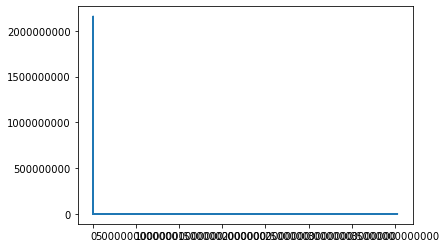

In [38]:
fig, ax = plt.subplots()
ax.plot(df_tmp["Area (Sq. Meter)"], df_tmp["Price (Lakh)"])
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [39]:
df_tmp["Price (Lakh)"]

0        900.0
1        800.0
2        700.0
3       1300.0
4       1000.0
         ...  
2206       5.0
2207     120.0
2208     270.0
2209       3.0
2210     725.0
Name: Price (Lakh), Length: 2211, dtype: float64

In [40]:
df_tmp.isna().sum()

Title                        0
Address                      0
City                         0
Bedroom                      0
Bathroom                     0
Floors                    1172
Parking                      0
Face                         0
Year                      1629
Views                        0
Road                         0
Road Width                   0
Road Type                  785
Posted                       0
Amenities                    0
Area (Sq. Meter)             1
Build Area (Sq. Meter)    1773
Price (Lakh)                 0
dtype: int64

In [41]:
def checkIfDuplicates(listOfElems):
    ''' 
    Check if given list contains any duplicates 
    and return the list without any duplicates
    '''    
    setOfElems = set()
    for elem in listOfElems:
        if elem in setOfElems:
            listOfElems.remove(elem)
        else:
            setOfElems.add(elem)         
    return listOfElems

In [42]:
def splitAddress(df_tmp):
    """
    Split address of Shova Bhagawati, Chamati-15, Kathmandu into
    tole = Shova Bhagawati
    place = Chamati-15
    city = Kathmandu
    and return it added to the dataframe
    """
    tole = []
    place = []
    city = []
    for index, content in enumerate(df_tmp["Address"]):
        splitted = checkIfDuplicates(content.split(","))
        tole.append(splitted[0])
        if tole[index].upper() == "NA":
            tole[index] = None
        place.append(",".join(splitted[1:-1]))
        if place[index] == "":
            place[index] = None
        city.append(splitted[-1])
    df_tmp["Tole"] = tole
    df_tmp["Place"] = place
    df_tmp["City"] = city
    df_tmp.drop("Address", axis=1, inplace=True)
    return df_tmp

In [43]:
df_tmp = splitAddress(df_tmp)

In [44]:
df_tmp.isna().sum()

Title                        0
City                         0
Bedroom                      0
Bathroom                     0
Floors                    1172
Parking                      0
Face                         0
Year                      1629
Views                        0
Road                         0
Road Width                   0
Road Type                  785
Posted                       0
Amenities                    0
Area (Sq. Meter)             1
Build Area (Sq. Meter)    1773
Price (Lakh)                 0
Tole                       192
Place                       57
dtype: int64

In [45]:
df_tmp.head(2).T

,0,1
Title,Flat System House On Sale At Budhanikantha : H...,21 Aana Beautiful House : House For Sale In Bu...
City,Kathmandu,Kathmandu
Bedroom,6,5
Bathroom,3,3
Floors,2,2
Parking,10,9
Face,West,East
Year,2073,2073
Views,17,26
Road,20 Feet / Blacktopped,20 Feet / Blacktopped


## Turning String into Categories

In [46]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Title
City
Face
Views
Road
Road Width
Road Type
Posted
Amenities
Tole
Place


In [47]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [48]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Title                   2211 non-null   category
 1   City                    2211 non-null   category
 2   Bedroom                 2211 non-null   int64   
 3   Bathroom                2211 non-null   int64   
 4   Floors                  1039 non-null   float64 
 5   Parking                 2211 non-null   int64   
 6   Face                    2211 non-null   category
 7   Year                    582 non-null    float64 
 8   Views                   2211 non-null   category
 9   Road                    2211 non-null   category
 10  Road Width              2211 non-null   category
 11  Road Type               1426 non-null   category
 12  Posted                  2211 non-null   category
 13  Amenities               2211 non-null   category
 14  Area (Sq. Meter)        

In [49]:
df_tmp.City.cat.categories

Index([' Bara', ' Bardiya', ' Bhairahawa', ' Bhaktapur', ' Biratnagar',
       ' Birtamod', ' Butwal', ' Chitwan', ' Dang', ' Dhading', ' Dharan',
       ' Illam', ' Itahari', ' Jhapa', ' Kailali', ' Kapilvastu', ' Kaski',
       ' Kathmandu', ' Kavre', ' Kirtipur', ' Lalitpur', ' Mahottari',
       ' Makwanpur', ' Morang', ' Nawalparasi', ' Nawalpur', ' Parsa',
       ' Pokhara', ' Rupandehi', ' Sunsari', ' Surkhet', ' Tanahu'],
      dtype='object')

In [50]:
df_tmp.City.cat.codes

0       17
1       17
2       17
3       17
4       17
        ..
2206    17
2207    17
2208    17
2209    17
2210    17
Length: 2211, dtype: int8

In [51]:
# Check missing data
df_tmp.isna().sum()/len(df_tmp)

Title                     0.000000
City                      0.000000
Bedroom                   0.000000
Bathroom                  0.000000
Floors                    0.530077
Parking                   0.000000
Face                      0.000000
Year                      0.736771
Views                     0.000000
Road                      0.000000
Road Width                0.000000
Road Type                 0.355043
Posted                    0.000000
Amenities                 0.000000
Area (Sq. Meter)          0.000452
Build Area (Sq. Meter)    0.801900
Price (Lakh)              0.000000
Tole                      0.086839
Place                     0.025780
dtype: float64

## Filling missing values

### Filling numeric values

In [52]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Floors
Year
Area (Sq. Meter)
Build Area (Sq. Meter)


In [53]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [54]:
df_tmp["Year_is_missing"].value_counts()

True     1629
False     582
Name: Year_is_missing, dtype: int64

### Turning categorical vairables into numbers and filling them

In [55]:
# Check for columns which aren't numeric()
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Title
City
Face
Views
Road
Road Width
Road Type
Posted
Amenities
Tole
Place


In [56]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [57]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Title                              2211 non-null   int16  
 1   City                               2211 non-null   int8   
 2   Bedroom                            2211 non-null   int64  
 3   Bathroom                           2211 non-null   int64  
 4   Floors                             2211 non-null   float64
 5   Parking                            2211 non-null   int64  
 6   Face                               2211 non-null   int8   
 7   Year                               2211 non-null   float64
 8   Views                              2211 non-null   int16  
 9   Road                               2211 non-null   int16  
 10  Road Width                         2211 non-null   int8   
 11  Road Type                          2211 non-null   int8 

In [58]:
df_tmp.head().T

,0,1,2,3,4
Title,565,73,290,1261,1265
City,18,18,18,18,18
Bedroom,6,5,5,6,6
Bathroom,3,3,3,4,3
Floors,2,2,2,3,2
Parking,10,9,12,9,10
Face,8,1,1,8,1
Year,2073,2073,2071,2017,2070
Views,85,186,67,85,526
Road,69,69,69,69,69


In [59]:
df_tmp.isna().sum()

Title                                0
City                                 0
Bedroom                              0
Bathroom                             0
Floors                               0
Parking                              0
Face                                 0
Year                                 0
Views                                0
Road                                 0
Road Width                           0
Road Type                            0
Posted                               0
Amenities                            0
Area (Sq. Meter)                     0
Build Area (Sq. Meter)               0
Price (Lakh)                         0
Tole                                 0
Place                                0
Floors_is_missing                    0
Year_is_missing                      0
Area (Sq. Meter)_is_missing          0
Build Area (Sq. Meter)_is_missing    0
Title_is_missing                     0
City_is_missing                      0
Face_is_missing          

## Import RandomForestRegressor for modelling

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Splitting data

In [61]:
X = df_tmp.drop("Price (Lakh)", axis = 1)
y = df_tmp["Price (Lakh)"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [62]:
%%time

np.random.seed(42)

# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Fitting the model
model.fit(X_train, y_train)

CPU times: user 2.64 s, sys: 11.7 ms, total: 2.65 s
Wall time: 781 ms


RandomForestRegressor(n_jobs=-1)

## For Evaluation

In [63]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_tes, y_preds):
    """
    Calculates root mean squred log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_tes, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Test RMSLE": rmsle(y_test, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Test R^2": r2_score(y_test, val_preds)}
    return scores

In [64]:
show_scores(model)

{'Training MAE': 3806338.309674177,
 'Test MAE': 5968407.487465298,
 'Training RMSLE': 3.3758467831770136,
 'Test RMSLE': 4.377062193548407,
 'Training R^2': 0.8265868860611583,
 'Test R^2': -103.82546468842666}

In [65]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Hyperparameter Tuning

In [66]:
%%time
from sklearn.model_selection import RandomizedSearchCV

np.random.seed()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
rf_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 45.1min finished


CPU times: user 7min 48s, sys: 32.9 s, total: 8min 21s
Wall time: 45min 5s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 266, 483, 700, 916,
                                                         1133, 1350, 1566, 1783,
                                                         2000]},
                   verbose=True)

In [67]:
rs_model.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [68]:
# Evaluate the RandomizedSearch MOdel
show_scores(rs_model)

{'Training MAE': 7335251.122459274,
 'Test MAE': 3939951.9211826897,
 'Training RMSLE': 9.118907894133033,
 'Test RMSLE': 9.356671354878427,
 'Training R^2': 0.3411300862648383,
 'Test R^2': -7.076535879955795}

In [72]:
%%time
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

rf_grid = {
    'bootstrap': [True],
    'max_depth': [70, 80, 90, 100],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [3, 4, 5],
    "n_estimators": [40, 50, 60, 70],
}

grid_search = GridSearchCV(RandomForestRegressor(n_jobs=-1),
                           param_grid = rf_grid,
                           cv=5,
                           verbose=True)

grid_search.fit(X, y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  4.2min finished


CPU times: user 1min 2s, sys: 5 s, total: 1min 7s
Wall time: 4min 10s


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'bootstrap': [True], 'max_depth': [70, 80, 90, 100],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [40, 50, 60, 70]},
             verbose=True)

In [75]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 70}

In [78]:
show_scores(grid_search)

{'Training MAE': 7839721.520270733,
 'Test MAE': 4072938.322025929,
 'Training RMSLE': 5.4848625774534945,
 'Test RMSLE': 5.867193553815877,
 'Training R^2': 0.2614512109001512,
 'Test R^2': -19.213466856620563}

## Exporting the best model

In [79]:
# Importing pickle
import pickle as pkl

In [82]:
pkl.dump(rs_model,open("data/best-model-on-sklearn-RFC.pkl","wb"))

In [83]:
loaded_model = pkl.load(open("data/best-model-on-sklearn-RFC.pkl","rb"))

In [84]:
show_scores(loaded_model)

{'Training MAE': 7335251.122459274,
 'Test MAE': 3939951.9211826897,
 'Training RMSLE': 9.118907894133033,
 'Test RMSLE': 9.356671354878427,
 'Training R^2': 0.3411300862648383,
 'Test R^2': -7.076535879955793}

Here there is no proper accuracy and since data was not properly stored accuracy was low.